In [3]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('train.csv')

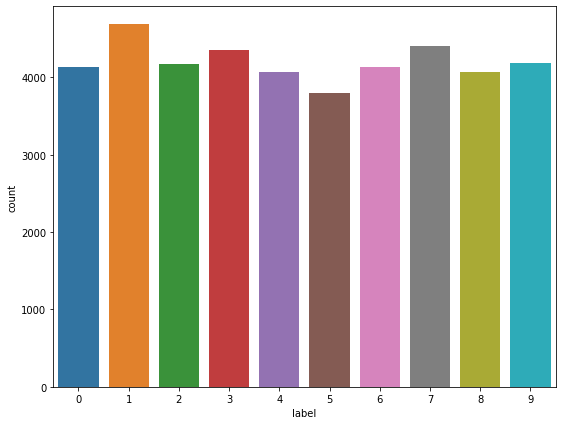

In [5]:
plt.figure(figsize=(9,7))
sns.countplot(x = df['label'])

In [6]:
dig = df.isnull()

In [7]:
df[df.apply(lambda x: x.count(), axis = 1) < 785]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
data = df.head(40000)

In [10]:
Y = data['label']
X = data.drop('label', axis = 1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 101)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [12]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
classifier = Sequential()

In [14]:
classifier.add(Convolution2D(20,3, input_shape = (28, 28, 1),activation = 'relu', padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [16]:
classifier.add(Convolution2D(30,3,activation = 'relu', padding='same'))

In [17]:
classifier.add(Convolution2D(40,3,activation = 'relu', padding='same'))

In [18]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [19]:
classifier.add(Flatten())

In [20]:
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 10, activation = 'softmax'))

C:\Users\Dell\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


In [21]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
trainX = X_train.reshape(X_train.shape[0],28,28, 1).astype( 'float32' )
testX = X_test.reshape(X_test.shape[0],28, 28, 1).astype( 'float32' )

In [23]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.fit_transform(Y_test)

In [24]:
classifier.fit(trainX, Y_train, batch_size = 100, epochs = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
28000/28000 [==============================] - 69s 2ms/step - loss: 0.2827 - acc: 0.9166
Epoch 2/2
28000/28000 [==============================] - 64s 2ms/step - loss: 0.0668 - acc: 0.9791


In [25]:
score = classifier.evaluate(testX, Y_test, batch_size=128)

12000/12000 [==============================] - 11s 905us/step


In [26]:
score

[0.06051201093196869, 0.9826666665077209]

In [27]:
testing = pd.read_csv('test.csv')

In [28]:
sc = StandardScaler()
testing = sc.fit_transform(testing)

In [29]:
testingX = testing.reshape(testing.shape[0],28,28, 1).astype( 'float32' )

In [30]:
y_pred = classifier.predict(testingX)

In [42]:
#serialise model to json

classifier_json = classifier.to_json()
with open("classifier.json", "w") as json_file:
    json_file.write(classifier_json)
    
#serialise weights as HDF5

classifier.save_weights("classifier.h5")
print("Saved")



Saved


In [45]:
from keras.models import model_from_json

#load json and create model
json_file = open("classifier.json", "r")
loaded_classifier_json = json_file.read()
json_file.close()

#load weights into new model
loaded_classifier = model_from_json(loaded_classifier_json)
loaded_classifier.load_weights("classifier.h5")


In [46]:
loaded_classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [47]:
score = loaded_classifier.evaluate(testX, Y_test, batch_size=128)
score

12000/12000 [==============================] - 12s 998us/step


[0.06051201093196869, 0.9826666665077209]

In [31]:
y_pred

array([[2.17526076e-06, 1.42206105e-08, 9.99972820e-01, ...,
        2.14643042e-05, 2.74739682e-06, 1.95222725e-07],
       [9.99600112e-01, 2.22492016e-08, 3.71216374e-05, ...,
        1.02016435e-04, 2.99522844e-06, 7.05412594e-06],
       [2.31134004e-06, 9.45056490e-06, 5.53672508e-05, ...,
        3.65735206e-04, 4.20696801e-03, 9.89920259e-01],
       ...,
       [1.55793503e-11, 5.34403806e-11, 3.14813908e-09, ...,
        8.86566269e-08, 1.63894867e-07, 2.22893277e-06],
       [8.69795440e-06, 7.46471130e-07, 1.47181674e-06, ...,
        4.75363946e-03, 3.58965190e-06, 9.71386790e-01],
       [6.54000019e-07, 1.01647146e-07, 9.99889970e-01, ...,
        1.90851970e-05, 8.40925131e-05, 2.64306823e-06]], dtype=float32)

In [32]:
len(y_pred)

28000

In [33]:
arr = np.ones(28000)
for i in range(28000):
    arr[i] = y_pred[i].argmax()

In [34]:
arr = arr.astype('int')

In [35]:
arr

array([2, 0, 9, ..., 3, 9, 2])

In [36]:
l = []
for i in range(1,28001):
    l.append(i)
l = np.array(l)

In [37]:
dct = {'ImageId': l, 'Label': arr}

In [38]:
df1 = pd.DataFrame(dct)

In [39]:
df1

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [40]:
df1.to_csv('Solution_cnn.csv')

In [41]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 30)        5430      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 40)        10840     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               251008    
__________